In [1]:
from __future__ import unicode_literals
from onmt.utils.logging import init_logger
from onmt.utils.misc import split_corpus
from onmt.translate.translator import build_translator

import onmt.opts as opts
from onmt.utils.parse import ArgumentParser

import matplotlib.pyplot as plt

from params_serialize import *
from plotter import *

In [16]:
# load the model and initialize the translator
parser = ArgumentParser()

opts.config_opts(parser)
opts.translate_opts(parser)
opt = parser.parse_args(['-model', '../../ChartDialog-save/save_models/s2s_single.1/model.s2s_single.1_step_100000.pt', '-src', '../../ChartDialog-save/s2s_single/src.test.txt'])

translator = build_translator(opt, report_score=False)

In [63]:
# initialize the TPSpec
eg0 = "plot_type none contour_plot_type none number_of_levels none density none arrow_size none arrow_style none surface_color none line_style none line_width none line_color none marker_type none marker_size none marker_face_color none marker_edge_width none marker_edge_color none marker_interval none number_of_bins none bar_relative_width none bar_face_color none bar_edge_width none bar_edge_color none bar_orientation none bar_width none bar_height none color_map none explode none precision_digits none percentage_distance_from_center none label_distance_from_center none radius none section_edge_width none section_edge_color none show_error_bar none error_bar_cap_size none error_bar_cap_thickness none error_bar_color none color_bar_orientation none color_bar_length none color_bar_thickness none polarize none x_axis_scale none y_axis_scale none x_axis_position none y_axis_position none data_series_name none font_size none invert_x_axis none invert_y_axis none invert_z_axis none grid_line_type none grid_line_color none grid_line_style none grid_line_width none"
eg1 = "plot_type pie_chart contour_plot_type None number_of_levels None density None arrow_size None arrow_style None surface_color None line_style None line_width None line_color None marker_type None marker_size None marker_face_color None marker_edge_width None marker_edge_color None marker_interval None number_of_bins None bar_relative_width None bar_face_color None bar_edge_width None bar_edge_color None bar_orientation None bar_width None bar_height None color_map None explode small precision_digits 1 percentage_distance_from_center near label_distance_from_center near radius large section_edge_width None section_edge_color None show_error_bar None error_bar_cap_size None error_bar_cap_thickness None error_bar_color None color_bar_orientation None color_bar_length None color_bar_thickness None polarize None x_axis_scale None y_axis_scale None x_axis_position None y_axis_position None data_series_name None font_size medium invert_x_axis None invert_y_axis None invert_z_axis None grid_line_type None grid_line_color None grid_line_style None grid_line_width None"
kwarg = eg0
data = None
args = None

In [68]:
# give the order that modifies the chart arguments
order_eg0 = "pie chart"
order_eg1 = "thicker line"
order = "polarize it"

In [69]:
text = [kwarg + " || " + order]
out = translator.translate(src=text, batch_size=1)
delta_tps = out[1][0][0]
print(delta_tps)

show_error_bar None polarize True x_axis_scale None y_axis_scale None x_axis_position None y_axis_position None invert_x_axis None invert_y_axis None


/home/yihan/py-pjt/chartdialogs/.venv/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)


line_color red <class 'str'> vs black <class 'str'>
line_width thin <class 'str'> vs medium <class 'str'>
data_series_name Position <class 'numpy.str_'> vs None <class 'NoneType'>
font_size large <class 'str'> vs medium <class 'str'>
grid_line_type vertical <class 'str'> vs None <class 'NoneType'>
grid_line_color blue <class 'str'> vs None <class 'NoneType'>
grid_line_style solid <class 'str'> vs None <class 'NoneType'>
grid_line_width very thin <class 'str'> vs None <class 'NoneType'>


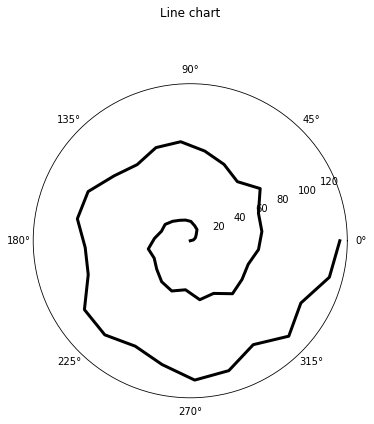

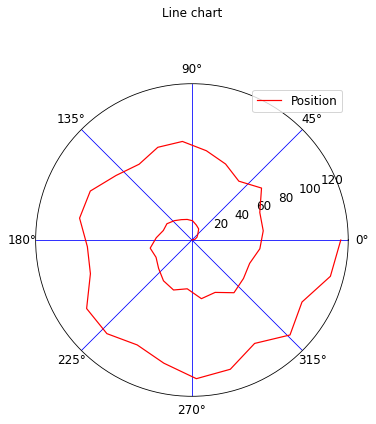

In [70]:
param = deserialize_single_1(kwarg)
delta = deserialize_single_1(delta_tps)

for k in delta.keys():
    param[k] = delta[k]

if data is None:
    if param['plot_type'] != 'none' and param['plot_type'] != 'None':
        data, args = sample_one(param['plot_type'])

if data is not None:
    for k in param.keys():
        if type(param[k]) == str:
            if param[k].lower() == 'none':
                param[k] = None
            elif param[k].isnumeric() and ('.' in param[k]):
                param[k] = float(param[k])
            elif param[k].isnumeric():
                param[k] = int(param[k])
            elif param[k].lower() == 'true':
                param[k] = True
            elif param[k].lower() == 'false':
                param[k] = False
    kwargs_unnat = plotter_kwargs_unnaturalize(**param)
    plotter(**data, **kwargs_unnat)
    plotter(**data, **plotter_kwargs_unnaturalize(**args))
    for k in args.keys():
            if args[k] != param[k]:
                print(k, args[k], type(args[k]), "vs", param[k], type(param[k]))
    #except KeyError:
     #   print("The given information is not enough to plot")

kwarg = serialize_single_1(param)

In [67]:
print(data)

{'x': array([ 0.        ,  0.25645654,  0.51291309,  0.76936963,  1.02582617,
        1.28228272,  1.53873926,  1.7951958 ,  2.05165235,  2.30810889,
        2.56456543,  2.82102197,  3.07747852,  3.33393506,  3.5903916 ,
        3.84684815,  4.10330469,  4.35976123,  4.61621778,  4.87267432,
        5.12913086,  5.38558741,  5.64204395,  5.89850049,  6.15495704,
        6.41141358,  6.66787012,  6.92432667,  7.18078321,  7.43723975,
        7.69369629,  7.95015284,  8.20660938,  8.46306592,  8.71952247,
        8.97597901,  9.23243555,  9.4888921 ,  9.74534864, 10.00180518,
       10.25826173, 10.51471827, 10.77117481, 11.02763136, 11.2840879 ,
       11.54054444, 11.79700098, 12.05345753, 12.30991407, 12.56637061]), 'y': array([  0.        ,   2.81217449,   5.02334263,   7.04180586,
        11.17956549,  13.40376551,  16.5875527 ,  18.18018457,
        19.7768375 ,  22.50781984,  25.70089462,  25.97580935,
        30.78023445,  36.64216211,  34.32277388,  37.7211412 ,
        42.8468